In [26]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [81]:
df = pd.read_csv("./dengue_features_train.csv")

In [82]:
df


city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0      sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1      sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2      sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3      sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4      sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   
...   ...   ...         ...             ...       ...       ...       ...   
1451   iq  2010          21      2010-05-28  0.342750  0.318900  0.256343   
1452   iq  2010          22      2010-06-04  0.160157  0.160371  0.136043   
1453   iq  2010          23      2010-06-11  0.247057  0.146057  0.250357   
1454   iq  2010          24      2010-06-18  0.333914  0.245771  0.278886   
1455   iq  2010          25      2010-06-25  0.298186  0.232971  0.274214   

       ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
0     0.177617                 12.42             297.572857  ...   
1     0.155486                 22.82             298.211429  ...   
2     0.170843                 34.54             298.781429  ...   
3     0.235886                 15.36             298.987143  ...   
4     0.247340                  7.52             299.518571  ...   
...        ...                   ...                    ...  ...   
1451  0.292514                 55.30             299.334286  ...   
1452  0.225657                 86.47             298.330000  ...   
1453  0.233714                 58.94             296.598571  ...   
1454  0.325486                 59.67             296.345714  ...   
1455  0.315757                 63.22             298.097143  ...   

      reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                               32.00                             73.365714   
1                               17.94                             77.368571   
2                               26.10                             82.052857   
3                               13.90                             80.337143   
4                               12.20                             80.460000   
...                               ...                                   ...   
1451                            45.00                             88.765714   
1452                           207.10                             91.600000   
1453                            50.60                             94.280000   
1454                            62.33                             94.660000   
1455                            36.90                             89.082857   

      reanalysis_sat_precip_amt_mm  reanalysis_specific_humidity_g_per_kg  \
0                            12.42                              14.012857   
1                            22.82                              15.372857   
2                            34.54                              16.848571   
3                            15.36                              16.672857   
4                             7.52                              17.210000   
...                            ...                                    ...   
1451                         55.30                              18.485714   
1452                         86.47                              18.070000   
1453                         58.94                              17.008571   
1454                         59.67                              16.815714   
1455                         63.22                              17.355714   

      reanalysis_tdtr_k  station_avg_temp_c  station_diur_temp_rng_c  \
0              2.628571           25.442857                 6.900000   
1              2.371429           26.714286                 6.371429   
2              2.300000           26.714286                 6.485714   
3              2.428571           27.471429                 6.771429   
4              3.014286      

In [83]:
df.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [84]:
df_lables = pd.read_csv('./dengue_labels_train.csv')

In [85]:
df_lables

city  year  weekofyear  total_cases
0      sj  1990          18            4
1      sj  1990          19            5
2      sj  1990          20            4
3      sj  1990          21            3
4      sj  1990          22            6
...   ...   ...         ...          ...
1451   iq  2010          21            5
1452   iq  2010          22            8
1453   iq  2010          23            1
1454   iq  2010          24            1
1455   iq  2010          25            4

[1456 rows x 4 columns]

In [86]:
final = pd.merge(df,df_lables,on=['city','year','weekofyear'])

In [27]:
final.to_csv('./final_merged_dengeAI.csv')

In [22]:
final.dtypes

city                                             object
year                                              int64
weekofyear                                        int64
week_start_date                          datetime64[ns]
ndvi_ne                                         float64
ndvi_nw                                         float64
ndvi_se                                         float64
ndvi_sw                                         float64
precipitation_amt_mm                            float64
reanalysis_air_temp_k                           float64
reanalysis_avg_temp_k                           float64
reanalysis_dew_point_temp_k                     float64
reanalysis_max_air_temp_k                       float64
reanalysis_min_air_temp_k                       float64
reanalysis_precip_amt_kg_per_m2                 float64
reanalysis_relative_humidity_percent            float64
reanalysis_sat_precip_amt_mm                    float64
reanalysis_specific_humidity_g_per_kg           

In [69]:
final['week_start_date'] = pd.to_datetime(final['week_start_date'])

In [18]:
list(final['week_start_date'].unique())

['1990-04-30',
 '1990-05-07',
 '1990-05-14',
 '1990-05-21',
 '1990-05-28',
 '1990-06-04',
 '1990-06-11',
 '1990-06-18',
 '1990-06-25',
 '1990-07-02',
 '1990-07-09',
 '1990-07-16',
 '1990-07-23',
 '1990-07-30',
 '1990-08-06',
 '1990-08-13',
 '1990-08-20',
 '1990-08-27',
 '1990-09-03',
 '1990-09-10',
 '1990-09-17',
 '1990-09-24',
 '1990-10-01',
 '1990-10-08',
 '1990-10-15',
 '1990-10-22',
 '1990-10-29',
 '1990-11-05',
 '1990-11-12',
 '1990-11-19',
 '1990-11-26',
 '1990-12-03',
 '1990-12-10',
 '1990-12-17',
 '1990-12-24',
 '1991-01-01',
 '1991-01-08',
 '1991-01-15',
 '1991-01-22',
 '1991-01-29',
 '1991-02-05',
 '1991-02-12',
 '1991-02-19',
 '1991-02-26',
 '1991-03-05',
 '1991-03-12',
 '1991-03-19',
 '1991-03-26',
 '1991-04-02',
 '1991-04-09',
 '1991-04-16',
 '1991-04-23',
 '1991-04-30',
 '1991-05-07',
 '1991-05-14',
 '1991-05-21',
 '1991-05-28',
 '1991-06-04',
 '1991-06-11',
 '1991-06-18',
 '1991-06-25',
 '1991-07-02',
 '1991-07-09',
 '1991-07-16',
 '1991-07-23',
 '1991-07-30',
 '1991-08-

In [87]:
final = final.drop('week_start_date',1)

In [38]:
final

year  weekofyear   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
0     1990          18  0.122600  0.103725  0.198483  0.177617   
1     1990          19  0.169900  0.142175  0.162357  0.155486   
2     1990          20  0.032250  0.172967  0.157200  0.170843   
3     1990          21  0.128633  0.245067  0.227557  0.235886   
4     1990          22  0.196200  0.262200  0.251200  0.247340   
...    ...         ...       ...       ...       ...       ...   
1451  2010          21  0.342750  0.318900  0.256343  0.292514   
1452  2010          22  0.160157  0.160371  0.136043  0.225657   
1453  2010          23  0.247057  0.146057  0.250357  0.233714   
1454  2010          24  0.333914  0.245771  0.278886  0.325486   
1455  2010          25  0.298186  0.232971  0.274214  0.315757   

      precipitation_amt_mm  reanalysis_air_temp_k  reanalysis_avg_temp_k  \
0                    12.42             297.572857             297.742857   
1                    22.82             298.211429             298.442857   
2                    34.54             298.781429             298.878571   
3                    15.36             298.987143             299.228571   
4                     7.52             299.518571             299.664286   
...                    ...                    ...                    ...   
1451                 55.30             299.334286             300.771429   
1452                 86.47             298.330000             299.392857   
1453                 58.94             296.598571             297.592857   
1454                 59.67             296.345714             297.521429   
1455                 63.22             298.097143             299.835714   

      reanalysis_dew_point_temp_k  ...  reanalysis_tdtr_k  station_avg_temp_c  \
0                      292.414286  ...           2.628571           25.442857   
1                      293.951429  ...           2.371429           26.714286   
2                      295.434286  ...           2.300000           26.714286   
3                      295.310000  ...           2.428571           27.471429   
4                      295.821429  ...           3.014286           28.942857   
...                           ...  ...                ...                 ...   
1451                   296.825714  ...           9.800000           28.633333   
1452                   296.452857  ...           7.471429           27.433333   
1453                   295.501429  ...           7.500000           24.400000   
1454                   295.324286  ...           7.871429           25.433333   
1455                   295.807143  ...          11.014286           27.475000   

      station_diur_temp_rng_c  station_max_temp_c  station_min_temp_c  \
0                    6.900000                29.4                20.0   
1                    6.371429                31.7                22.2   
2                    6.485714                32.2                22.8   
3                    6.771429                33.3                23.3   
4                    9.371429                35.0                23.9   
...                       ...                 ...                 ...   
1451                11.933333                35.4                22.4   
1452                10.500000                34.7                21.7   
1453                 6.900000                32.2                19.2   
1454                 8.733333                31.2                21.0   
1455                 9.900000                33.7                22.2   

      station_precip_mm  total_cases  city_iq  city_sj  city_nan  
0                  16.0            4        0        1         0  
1                   8.6            5        0        1         0  
2                  41.4            4        0        1         0  
3                   4.0            3        0        1         0  
4                   5.8            6        0        1         0  
...                 ...          ...      ...   

In [106]:
import seaborn as sns

In [109]:
final.columns

Index(['year', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases', 'city_iq',
       'city_sj', 'city_nan'],
      dtype='object')

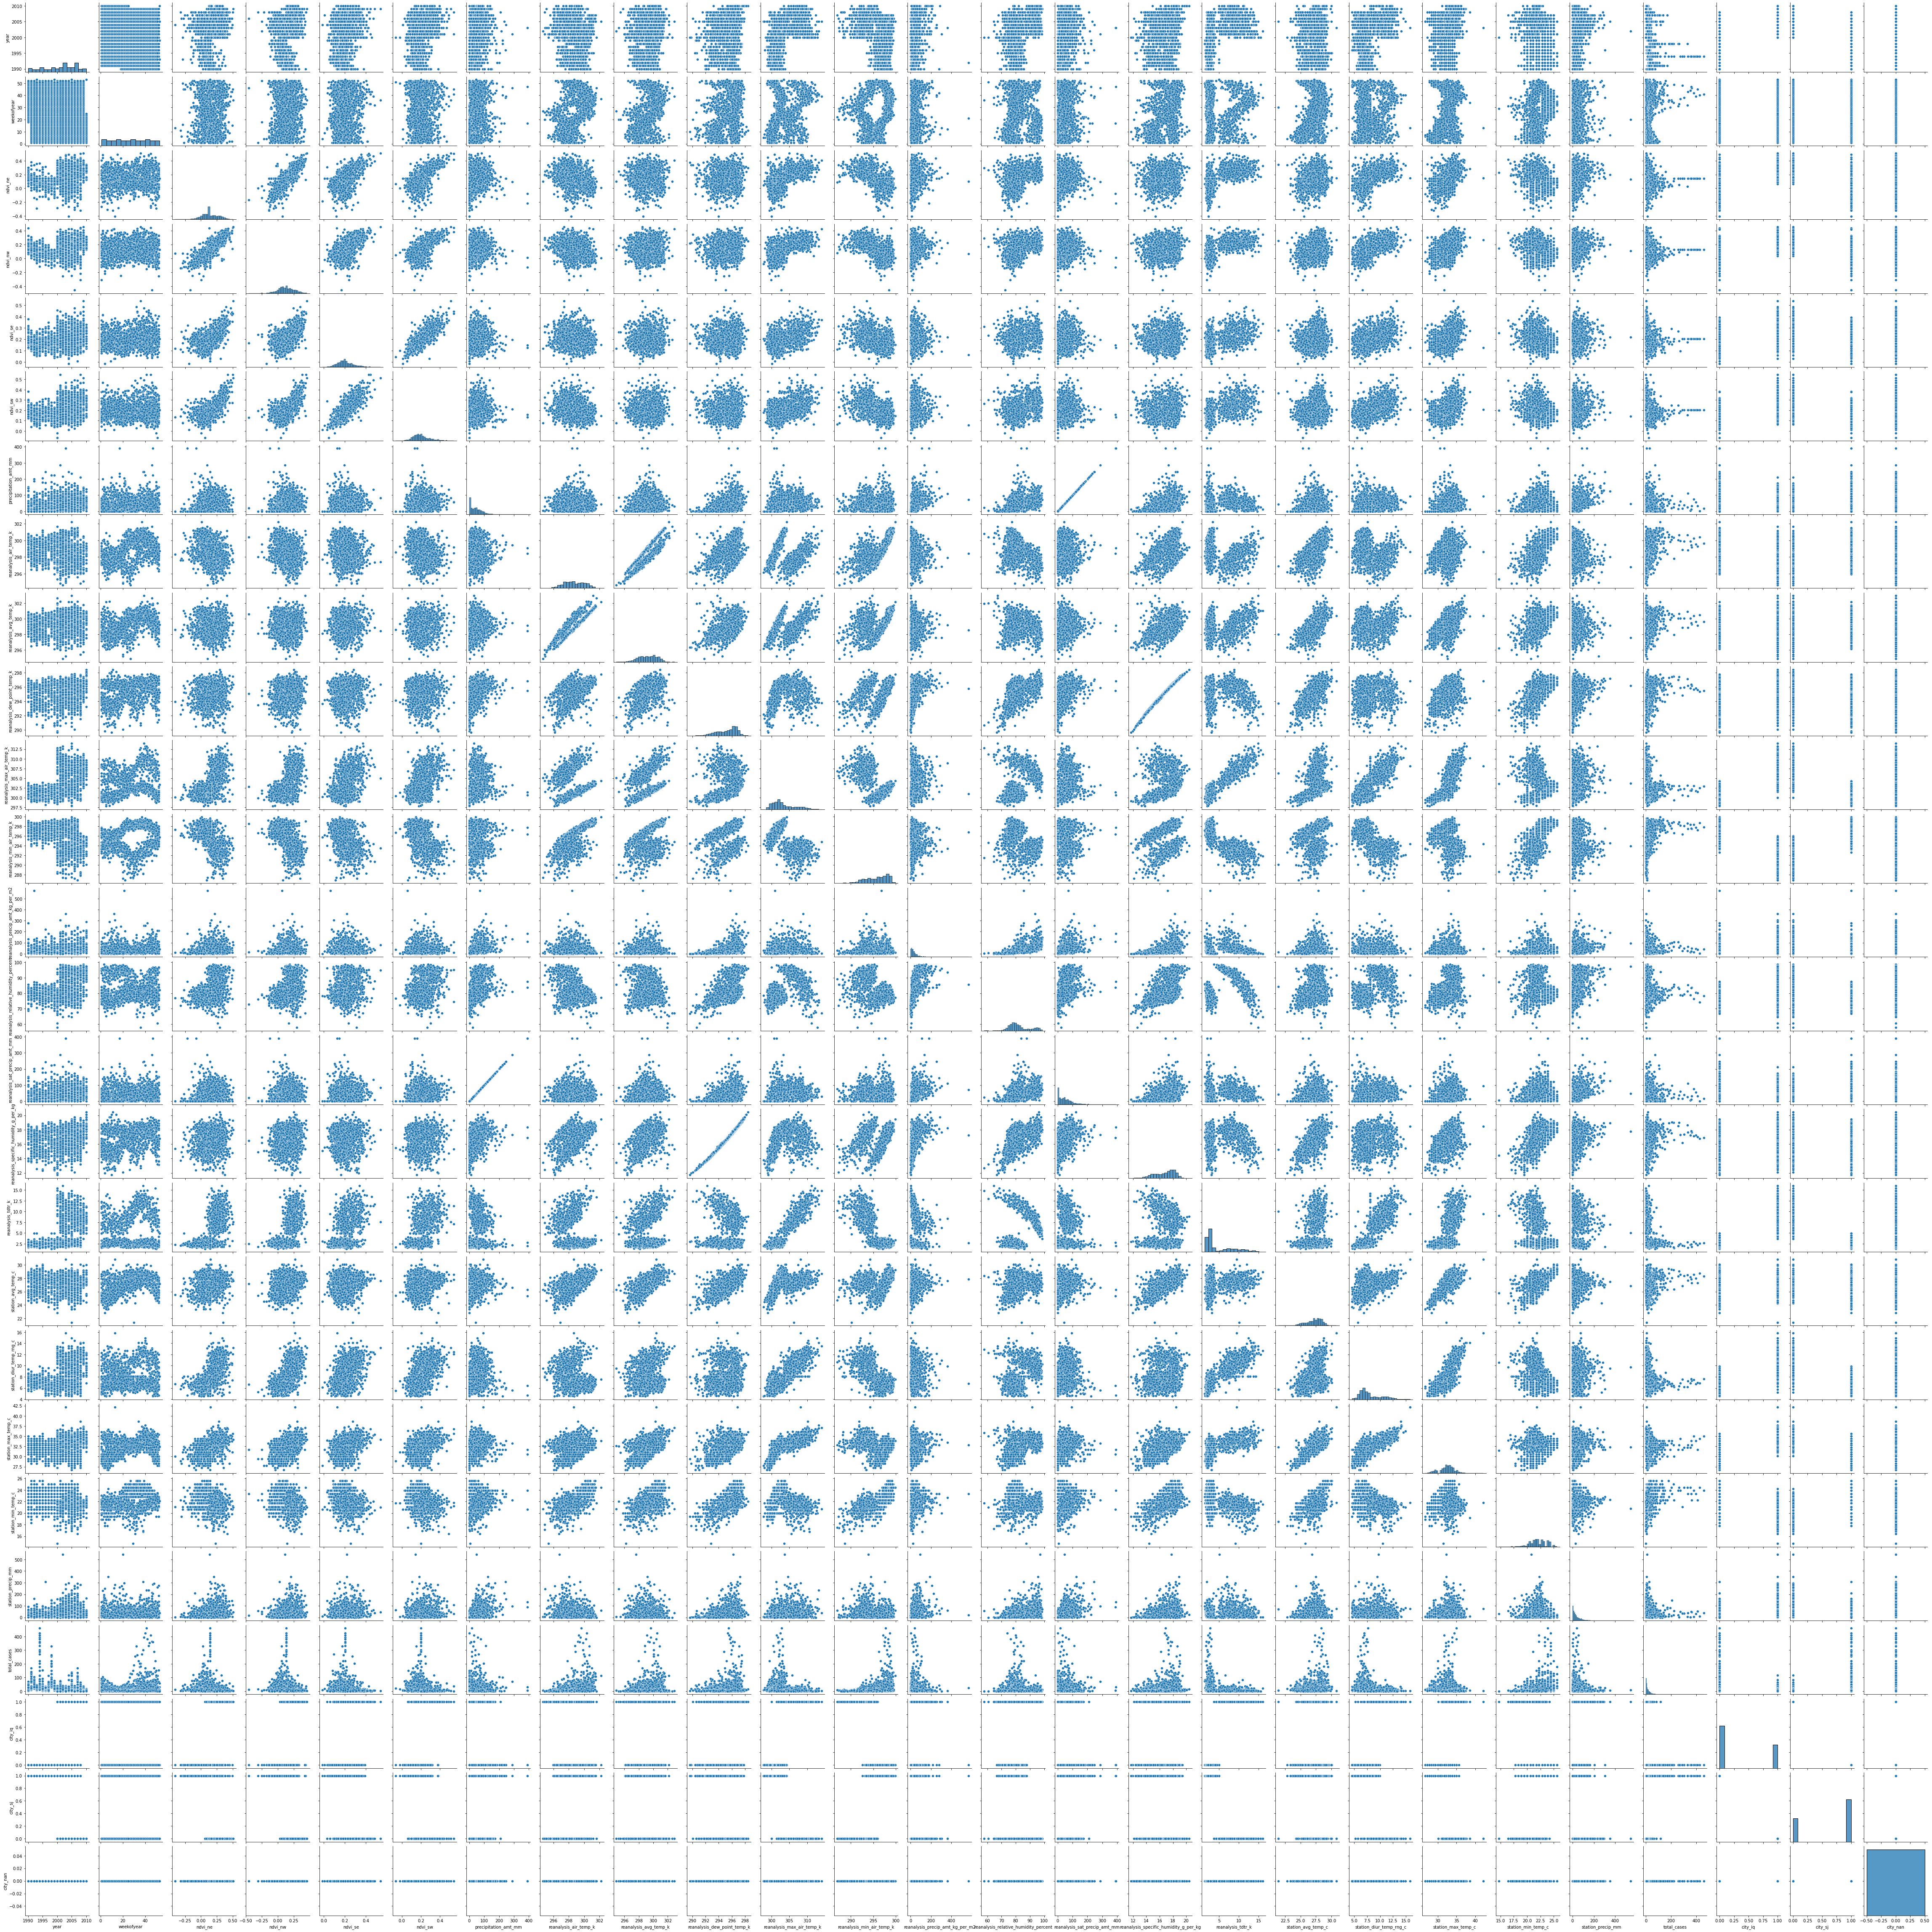

In [108]:
sns.pairplot(final)

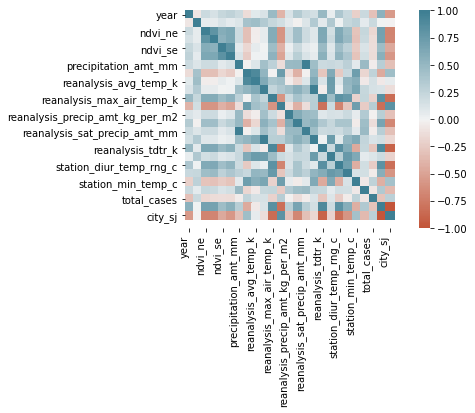

In [111]:
corr = final.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

<AxesSubplot:>

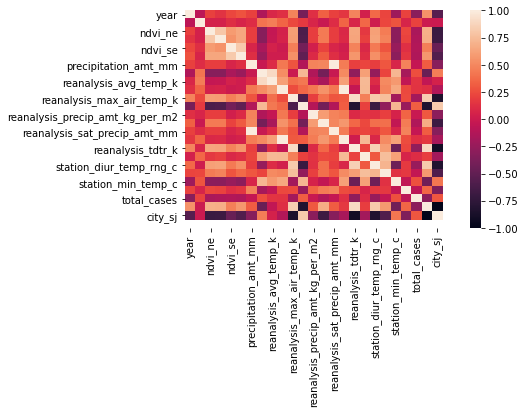

In [112]:
sns.heatmap(final.corr())

In [37]:
final['city'].value_counts()

KeyError: 'city'

In [88]:
final = pd.get_dummies(final,columns=['city'], dummy_na=True)

In [89]:
model = LinearRegression()

In [95]:
for x in final.columns:
    if final[x].isnull().values.any():
        print(x)
        final[x].fillna(final[x].mean(),inplace=True)

ndvi_ne
ndvi_nw
ndvi_se
ndvi_sw
precipitation_amt_mm
reanalysis_air_temp_k
reanalysis_avg_temp_k
reanalysis_dew_point_temp_k
reanalysis_max_air_temp_k
reanalysis_min_air_temp_k
reanalysis_precip_amt_kg_per_m2
reanalysis_relative_humidity_percent
reanalysis_sat_precip_amt_mm
reanalysis_specific_humidity_g_per_kg
reanalysis_tdtr_k
station_avg_temp_c
station_diur_temp_rng_c
station_max_temp_c
station_min_temp_c
station_precip_mm


In [61]:
final['ndvi_ne'].mean()

0.12333409630494513

In [96]:
final.isna().sum()


year                                     0
weekofyear                               0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_precip_mm                        0
total_cases                              0
city_iq    

In [ ]:
final.drop()

In [72]:
final['ndvi_ne'].fillna(0,inplace=True)

In [73]:
final.fillna(0,inplace=True)

In [97]:
model.fit(final.drop(['total_cases'],1),final['total_cases'])

LinearRegression()

In [98]:
y_pred = model.predict(final.drop(['total_cases'],1))

In [99]:
y_test = final['total_cases']

In [100]:
import matplotlib.pyplot as plt


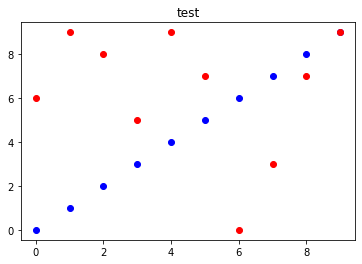

In [101]:
import matplotlib.pyplot as plt
import numpy as np


def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(regressorName)
    plt.show()
    return


y_test = range(10)
y_pred = np.random.randint(0, 10, 10)

plotGraph(y_test, y_pred, "test")

In [102]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df.head(10))

   Actual  Predicted
0       0          6
1       1          9
2       2          8
3       3          5
4       4          9
5       5          7
6       6          0
7       7          3
8       8          7
9       9          9


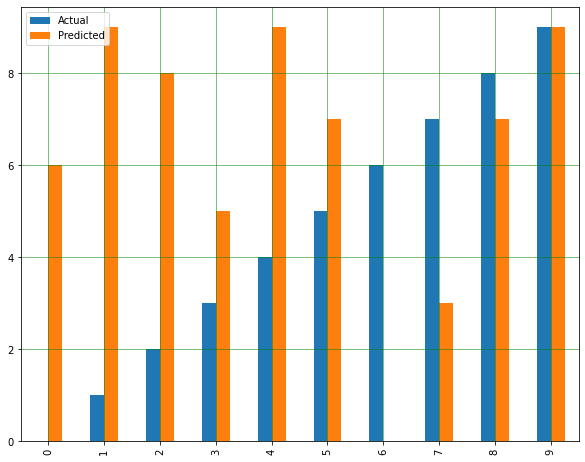

In [103]:
df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()